In [51]:
import argparse
import sys
sys.path.append('../src')
import rnn_encoder_decoder
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import torch
def showAttention(input_sentence, output_words, attentions):
    """
    Function that takes in attention and visualize the attention.
    @param - input_sentence: string the represent a list of words from source language
    @param - output_words: the gold translation in target language
    @param - attentions: a numpy array
    """
    input_sentence = input_sentence.split(' ')
    output_sentence = output_words.split(' ')
    # Set up figure with colorbar    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.detach().cpu().numpy()[:len(output_sentence)+1,:len(input_sentence)+2], cmap='gray')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels(['','<SOS>'] + input_sentence+
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_sentence+
                       ['<EOS>'])

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [2]:
parser = rnn_encoder_decoder.rnn_encoder_decoder_argparser()
args = parser.parse_args([]) # use default settings
args.source_lang = 'vi'
args.data = '../data/short-sentences-vi-en/'
args.num_encoder_layers = 1
args.num_decoder_layers = 1
args.test = True
args.relu = True
args.attention = True
args.bidirectional = True
# load best weight of this experiment
args.model_weights_path = '../model_weights/rnn_encoder_decoder/14'
#rnn_encoder_decoder.run(args)
loss, bleu, test_source_list, test_reference_list, translation_output_list, attention_list = rnn_encoder_decoder.run(args)
for triplet in zip(test_source_list[0], test_reference_list[0], translation_output_list[0]):
    print(triplet)

Using device cuda
Most common source vocabs: [('là', 8210), ('tôi', 3628), ('không', 3530), ('Và', 3413), ('một', 3290), ('có', 2911), ('đó', 2883), ('Tôi', 2827), ('của', 2605), ('này', 2532)]
Source vocab size: 6495
Most common english vocabs: [('the', 10506), ('it', 7023), ('and', 6401), ('&apos;s', 6272), ('a', 5965), ('to', 5712), ('i', 5688), ('is', 5612), ('you', 5432), ('of', 4902)]
English vocab size: 5897
0 <unk>
0 <unk>
1 <pad>
1 <pad>
2 <sos>
2 <sos>
3 <eos>
3 <eos>
4 là
4 the


/home/jp4989/anaconda3/envs/nlpclass/lib/python3.6/site-packages/torchtext/data/field.py:321: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(arr, volatile=not train), lengths
/home/jp4989/anaconda3/envs/nlpclass/lib/python3.6/site-packages/torchtext/data/field.py:322: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(arr, volatile=not train)
/home/jp4989/anaconda3/envs/nlpclass/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


test, step: 0, average loss for current epoch: 3.834120444201548, batch loss: 3.834120444201548, average bleu for current epoch: 21.166182065677546, batch bleu: 21.166182065677546
test done. average loss for current epoch: 5.156336722270454, average bleu for current epoch: 6.58578226016833
('Cảm_ơn các bạn', 'thank you', 'thank you')
('Ôi chúa ơi', 'oh my god', 'oh oh')
('Chúng_ta bắt_đầu nào', 'all right let &apos;s go', 'we started started')
('Ồ tại_sao không', 'hey why not', 'well why')
('đọc xong chứ', 'is that all', '&quot; reading &quot;')
('Cám_ơn rất nhiều', 'thank you very much', 'thank you very much')
('Chúng_ta thích cải_tiến', 'we love innovation', 'we &apos;re to improve')
('Như_thế quá vô_lương_tâm', 'it would be unconscionable', 'so this is so <unk>')
('chúng_ta không_ngừng mâu_thuẫn', 'we &apos;re constantly running into each other', 'we &apos;re not <unk> <unk>')
('thế_là chúng_ta tách_biệt', 'we &apos;ve been disconnected', 'they were closed')
('Tôi không biết', 'i do

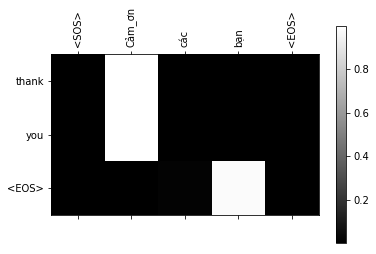

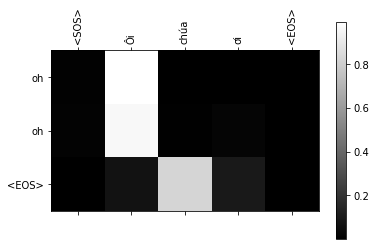

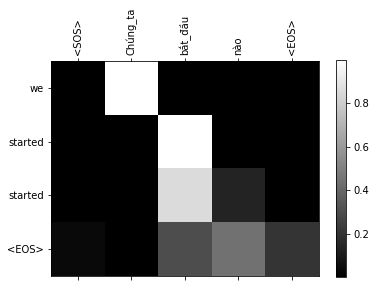

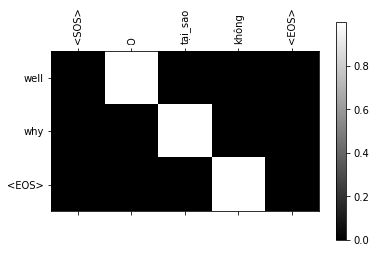

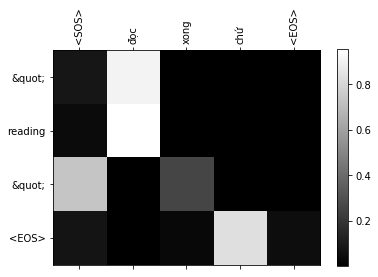

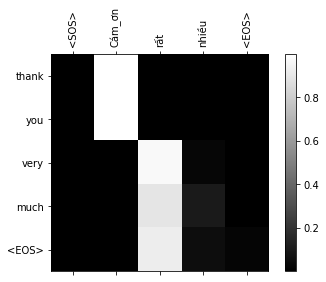

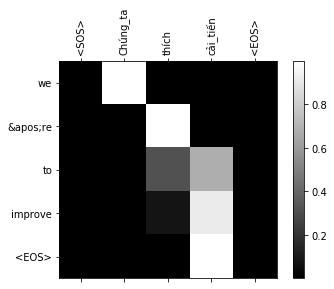

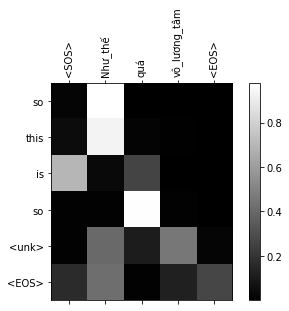

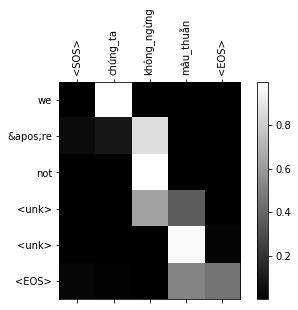

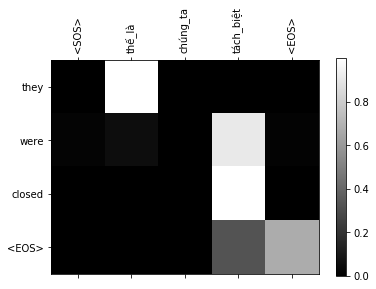

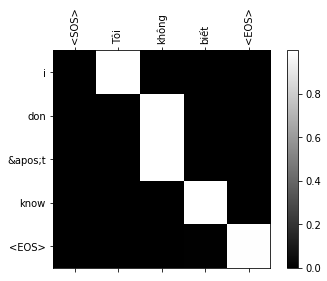

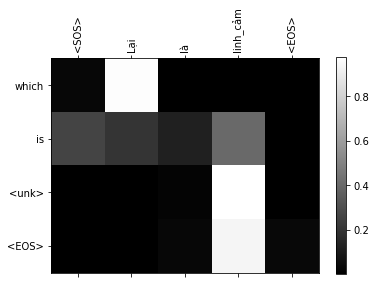

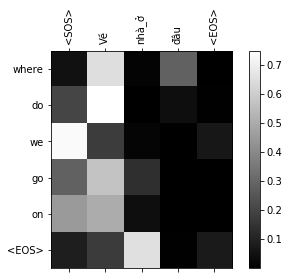

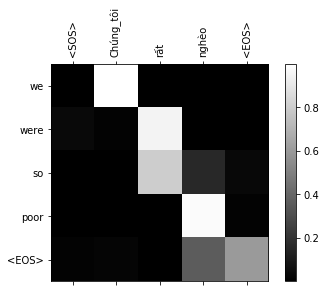

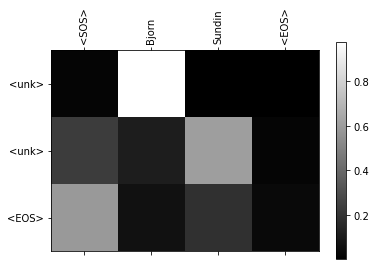

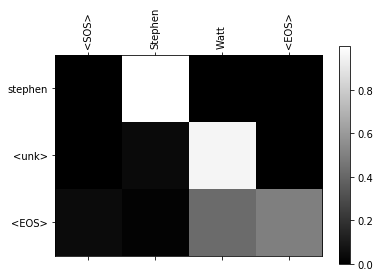

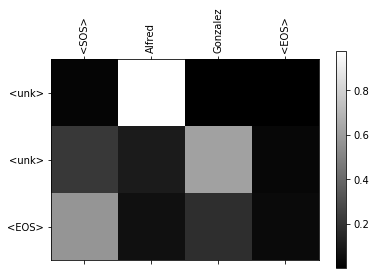

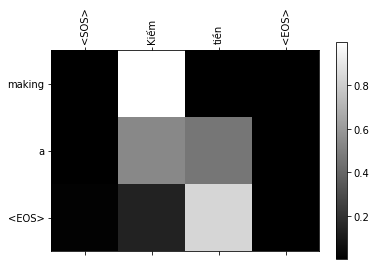

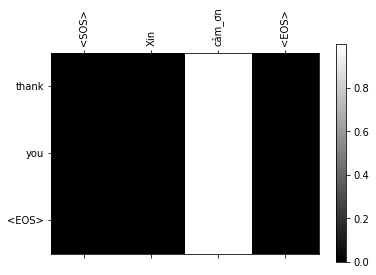

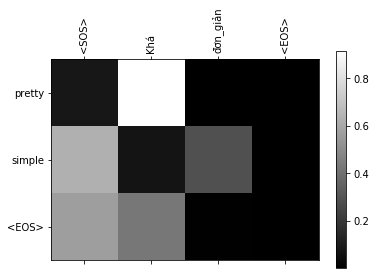

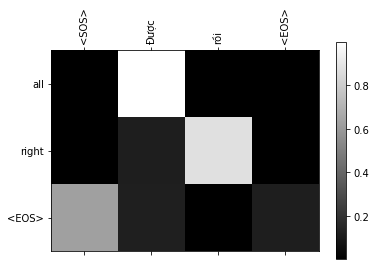

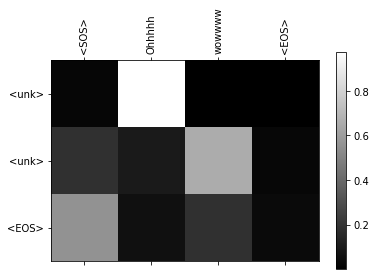

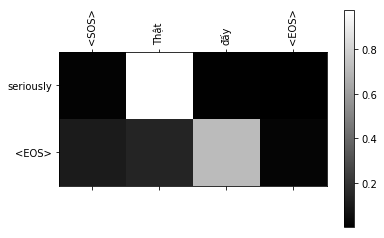

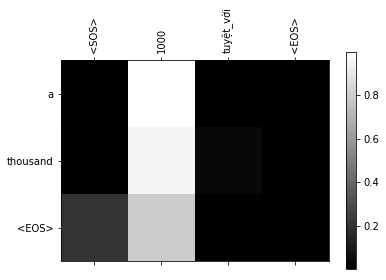

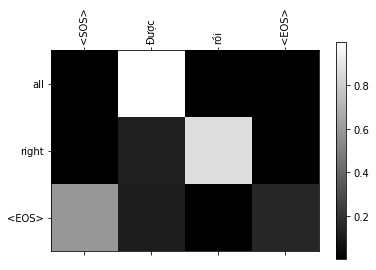

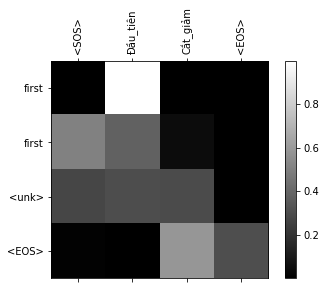

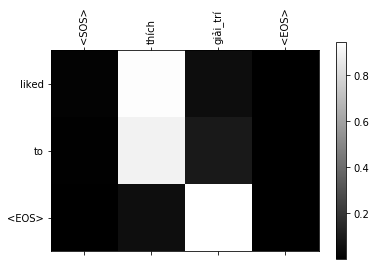

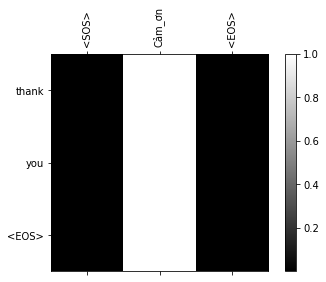

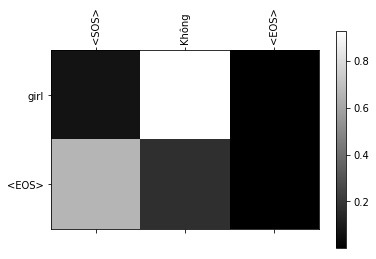

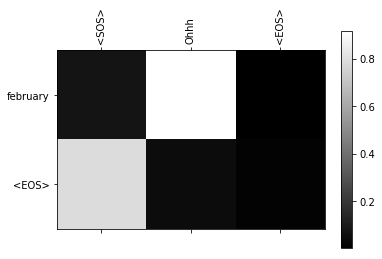

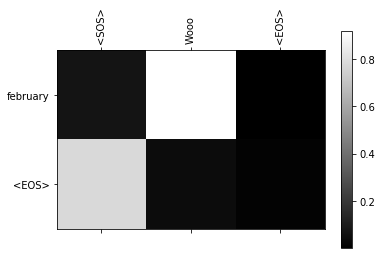

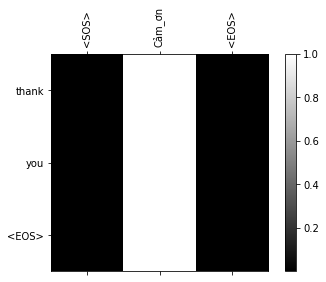

In [52]:
for i in range(1):
    combined_attention_list = torch.cat(attention_list[i], dim=0)
    for j, (input_sentence, output_words) in enumerate(zip(test_source_list[i], translation_output_list[i])):
        showAttention(input_sentence, output_words, combined_attention_list[:,j,:])
